# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-01-10 06:40:10--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   181MB/s    in 0.4s    

2023-01-10 06:40:11 (181 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [3]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Jan 10 06:40 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Jan  5 14:34 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [5]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Jan 10 06:40 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Jan  5 14:34 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> ## 3) 'Time' -> 'hours'
* 'Time': 각 거래와 첫 번째 거래 사이에 경과된 초('Seconds') 

> ### (1) 시간('hours') 정보 생성

In [8]:
timedelta = pd.to_timedelta(DF['Time'], unit = 's')

DF['Time'] = (timedelta.dt.components.hours).astype(int)

In [9]:
DF.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


> ### (2) 시간별 거래량

In [10]:
DF['Time'].value_counts()

21    17703
18    17039
11    16856
20    16756
10    16598
14    16570
15    16461
16    16453
17    16166
9     15838
19    15649
22    15441
12    15420
13    15365
23    10938
8     10276
0      7695
7      7243
1      4220
6      4101
3      3492
2      3328
5      2990
4      2209
Name: Time, dtype: int64

> ### (3) 시간별 거래량 Visualization

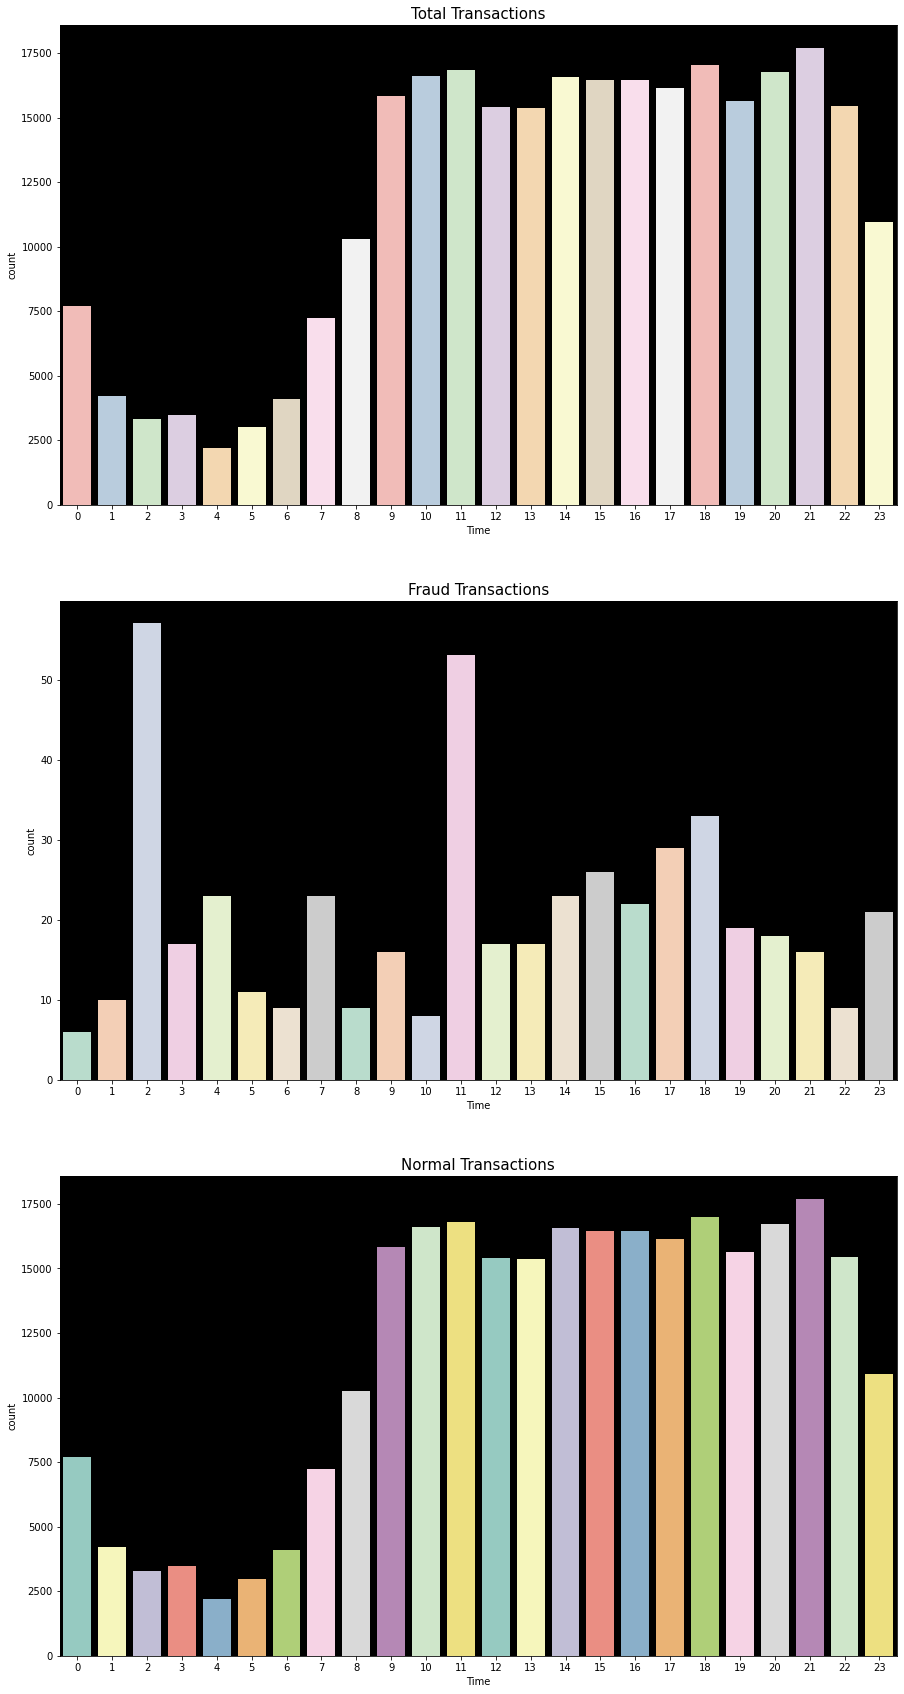

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, figsize = (15, 30))

sns.countplot(DF['Time'], 
              ax = axs[0], 
              palette = 'Pastel1')
axs[0].set_title('Total Transactions', 
                 fontsize = 15)
axs[0].set_facecolor("black")

sns.countplot(DF[(DF['Class'] == 1)]['Time'], 
              ax = axs[1], 
              palette = 'Pastel2')
axs[1].set_title('Fraud Transactions', 
                 fontsize = 15)
axs[1].set_facecolor('black')

sns.countplot(DF[(DF['Class'] == 0)]['Time'], 
              ax = axs[2], 
              palette = 'Set3')
axs[2].set_title('Normal Transactions', 
                 fontsize = 15)
axs[2].set_facecolor("black")

plt.show()

> ## 4) train_test_split( )

> ### (1) X (Input), y (Output) 지정

In [12]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 30), (284807,))

> ### (2) With 'stratify'

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [14]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# III. Modeling - Decison Tree

> ## 1) Without SMOTE

> ### (1) Model 학습

In [15]:
%%time

from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

CPU times: user 26.9 s, sys: 87 ms, total: 26.9 s
Wall time: 29.8 s


DecisionTreeClassifier(random_state=2045)

> ### (2) 예측값 생성

In [16]:
y_hat = Model_dt.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  121,    27],
       [   34, 85261]])

* Scores

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99968   0.99960   0.99964     85295
          부정    0.78065   0.81757   0.79868       148

    accuracy                        0.99929     85443
   macro avg    0.89016   0.90858   0.89916     85443
weighted avg    0.99930   0.99929   0.99929     85443



> ### (4) Feature Importance

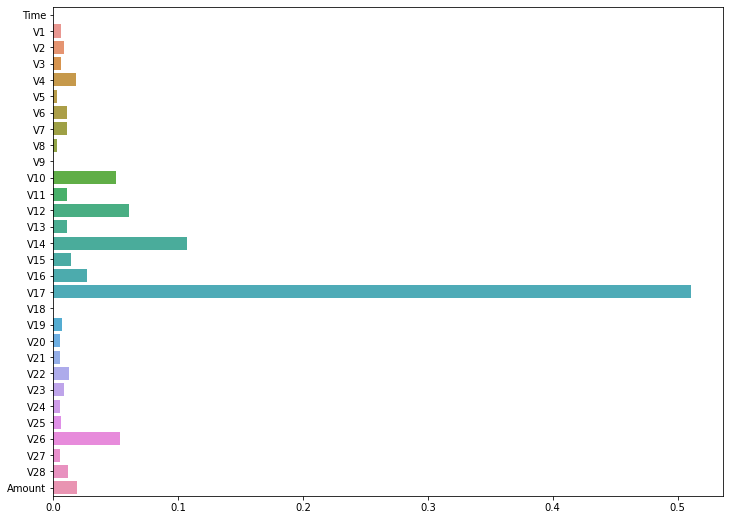

In [19]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_dt.feature_importances_,
            X_train.columns)
plt.show()

> ## 2) SMOTE

* Synthetic Minority Over-sampling TEchnique
* KNN(K-Nearst Neighbor) : K개의 이웃과 일정 값의 차이를 가지를 새로운 데이터를 생성
* imbalanced-learn Package

> ### > (1) Before SMORT

In [20]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [21]:
pd.Series(y_train).value_counts()

0    199020
1       344
Name: Class, dtype: int64

> ### (2) imbalanced-learn Package

In [22]:
from imblearn.over_sampling import SMOTE 

> ### (3) After SMOTE

In [23]:
%%time

OS = SMOTE(random_state = 2045)

X_train_OS, y_train_OS = OS.fit_resample(X_train, y_train)

CPU times: user 295 ms, sys: 215 ms, total: 510 ms
Wall time: 396 ms


In [24]:
X_train_OS.shape, y_train_OS.shape

((398040, 30), (398040,))

* 0 (정상) Class와 1 (사기) Class 개수

In [25]:
pd.Series(y_train_OS).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

> ## 3) With SMOTE

> ### (1) Model 학습

In [26]:
%%time 

from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train_OS, y_train_OS)

CPU times: user 39.1 s, sys: 50.5 ms, total: 39.2 s
Wall time: 39 s


DecisionTreeClassifier(random_state=2045)

> ### (2) 예측값 생성

In [27]:
y_hat = Model_dt.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  123,    25],
       [  174, 85121]])

* Scores

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99971   0.99796   0.99883     85295
          부정    0.41414   0.83108   0.55281       148

    accuracy                        0.99767     85443
   macro avg    0.70692   0.91452   0.77582     85443
weighted avg    0.99869   0.99767   0.99806     85443



> ### (4) Feature Importance

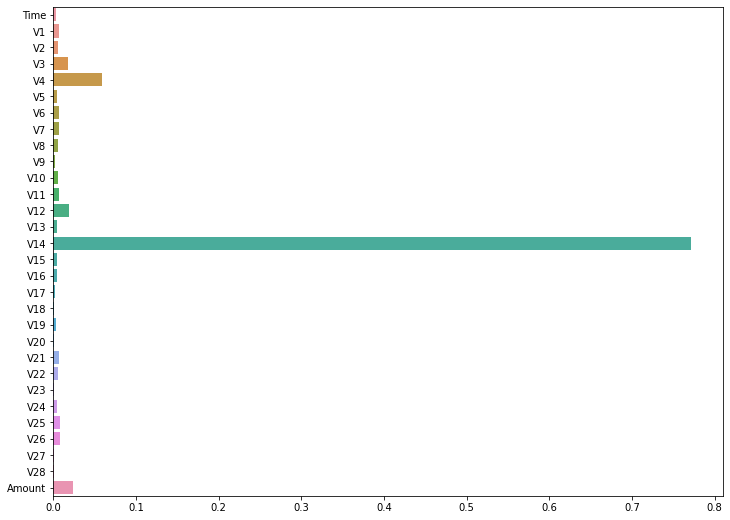

In [30]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_dt.feature_importances_,
            X_train.columns)
plt.show()

# IV. Modeling - RandomForest

> ## 1) Without SMOTE

* 약 4분

> ### (1) Model 학습

In [31]:
%%time

from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(random_state = 2045)
Model_rf.fit(X_train, y_train)

CPU times: user 3min 36s, sys: 267 ms, total: 3min 36s
Wall time: 3min 36s


RandomForestClassifier(random_state=2045)

> ### (2) 예측값 생성

In [32]:
y_hat = Model_rf.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  124,    24],
       [   11, 85284]])

* Scores

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99972   0.99987   0.99979     85295
          부정    0.91852   0.83784   0.87633       148

    accuracy                        0.99959     85443
   macro avg    0.95912   0.91885   0.93806     85443
weighted avg    0.99958   0.99959   0.99958     85443



> ### (4) Feature Importance

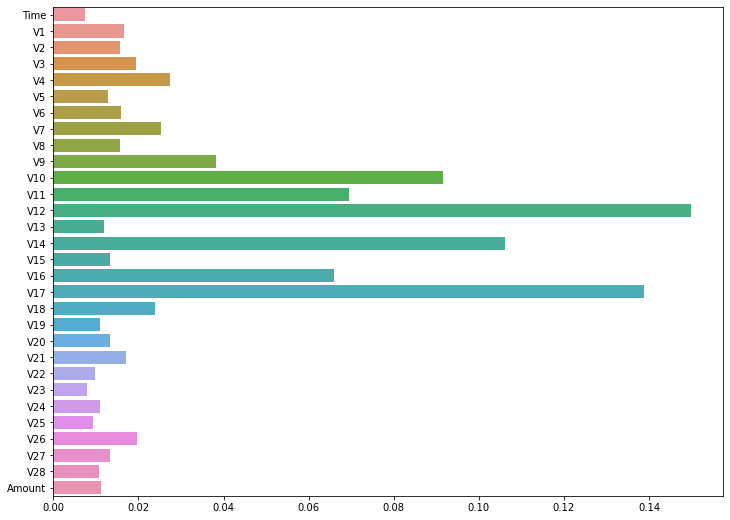

In [35]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_rf.feature_importances_,
            X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 6분

> ### (1) Model 학습

In [36]:
%%time 

from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(random_state = 2045)
Model_rf.fit(X_train_OS, y_train_OS)

CPU times: user 6min 18s, sys: 505 ms, total: 6min 19s
Wall time: 6min 18s


RandomForestClassifier(random_state=2045)

> ### (2) 예측값 생성

In [37]:
y_hat = Model_rf.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  131,    17],
       [   18, 85277]])

* Scores

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99980   0.99979   0.99979     85295
          부정    0.87919   0.88514   0.88215       148

    accuracy                        0.99959     85443
   macro avg    0.93950   0.94246   0.94097     85443
weighted avg    0.99959   0.99959   0.99959     85443



> ### (4) Feature Importance

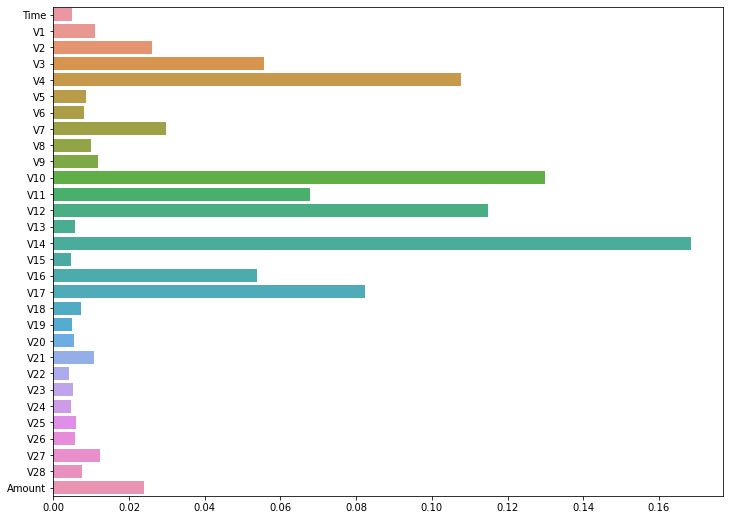

In [40]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_rf.feature_importances_,
            X_train.columns)
plt.show()

# V. Modeling - Adaptive Boosting

> ## 1) Without SMOTE

* 약 2분

> ### (1) Model 학습

In [41]:
%%time

from sklearn.ensemble import AdaBoostClassifier

Model_ab = AdaBoostClassifier(random_state = 2045)
Model_ab.fit(X_train, y_train)

CPU times: user 1min 12s, sys: 158 ms, total: 1min 12s
Wall time: 1min 12s


AdaBoostClassifier(random_state=2045)

> ### (2) 예측값 생성

In [42]:
y_hat = Model_ab.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  113,    35],
       [   29, 85266]])

* Scores

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99959   0.99966   0.99962     85295
          부정    0.79577   0.76351   0.77931       148

    accuracy                        0.99925     85443
   macro avg    0.89768   0.88159   0.88947     85443
weighted avg    0.99924   0.99925   0.99924     85443



> ### (4) Feature Importance

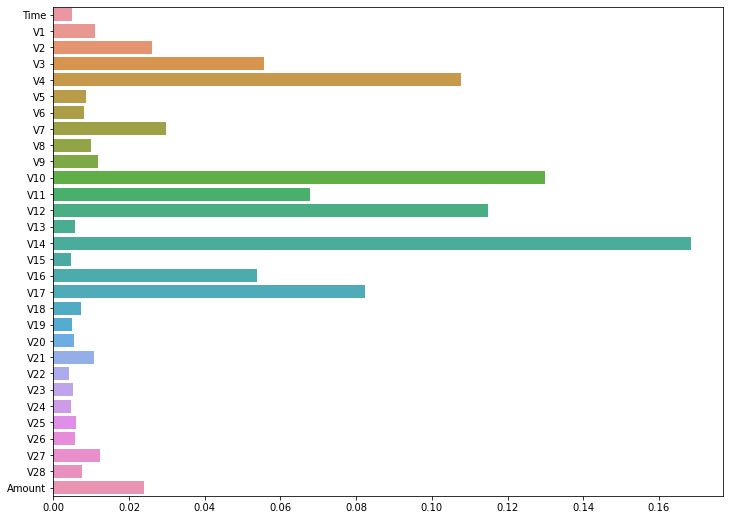

In [45]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_rf.feature_importances_,
            X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 3분

> ### (1) Model 학습

In [46]:
%%time 

from sklearn.ensemble import AdaBoostClassifier

Model_ab = AdaBoostClassifier(random_state = 2045)
Model_ab.fit(X_train_OS, y_train_OS)

CPU times: user 2min 51s, sys: 310 ms, total: 2min 51s
Wall time: 2min 51s


AdaBoostClassifier(random_state=2045)

> ### (2) 예측값 생성

In [47]:
y_hat = Model_ab.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  135,    13],
       [ 1647, 83648]])

* Scores

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99984   0.98069   0.99017     85295
          부정    0.07576   0.91216   0.13990       148

    accuracy                        0.98057     85443
   macro avg    0.53780   0.94643   0.56504     85443
weighted avg    0.99824   0.98057   0.98870     85443



> ### (4) Feature Importance

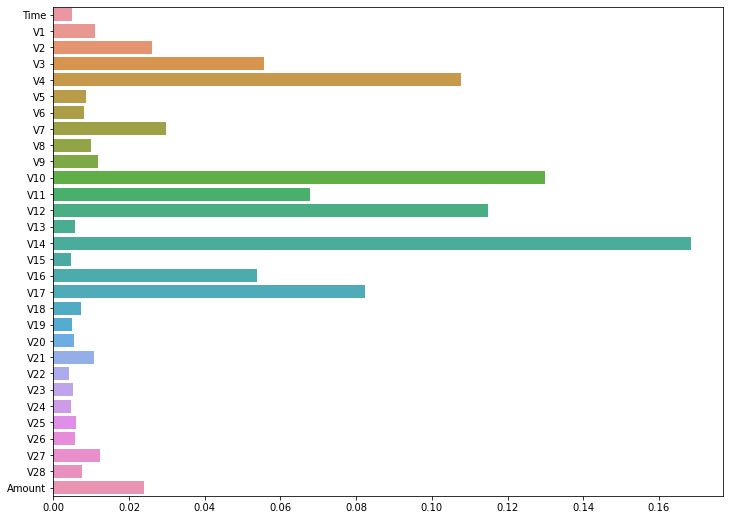

In [50]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_rf.feature_importances_,
            X_train.columns)
plt.show()

# VI. Modeling - Gradient Boosting Machine (GBM)

> ## 1) Without SMOTE

* 약 6분

> ### (1) Model 학습

In [51]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

Model_gbm = GradientBoostingClassifier(random_state = 2045)
Model_gbm.fit(X_train, y_train)

CPU times: user 5min 25s, sys: 405 ms, total: 5min 25s
Wall time: 5min 25s


GradientBoostingClassifier(random_state=2045)

> ### (2) 예측값 생성

In [52]:
y_hat = Model_gbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[   94,    54],
       [   28, 85267]])

* Scores

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99937   0.99967   0.99952     85295
          부정    0.77049   0.63514   0.69630       148

    accuracy                        0.99904     85443
   macro avg    0.88493   0.81740   0.84791     85443
weighted avg    0.99897   0.99904   0.99899     85443



> ### (4) Feature Importance

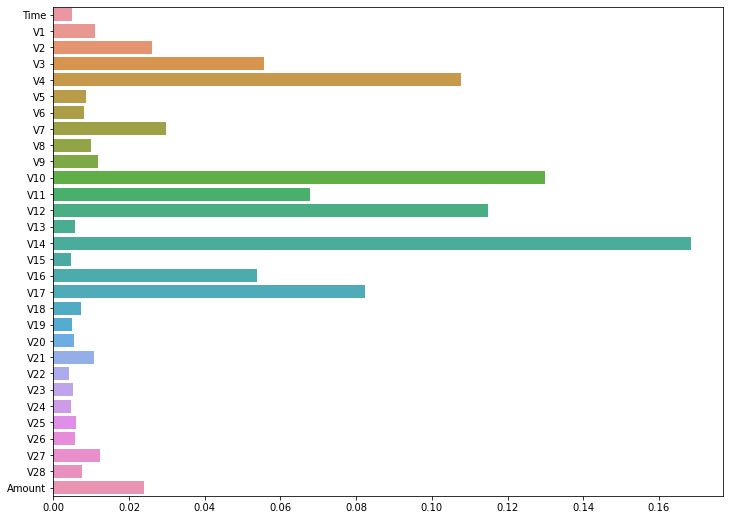

In [55]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_rf.feature_importances_,
            X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 3분

> ### (1) Model 학습

In [56]:
%%time 

from sklearn.ensemble import GradientBoostingClassifier

Model_gbm = AdaBoostClassifier(random_state = 2045)
Model_gbm.fit(X_train_OS, y_train_OS)

CPU times: user 2min 39s, sys: 284 ms, total: 2min 39s
Wall time: 2min 39s


AdaBoostClassifier(random_state=2045)

> ### (2) 예측값 생성

In [57]:
y_hat = Model_gbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  135,    13],
       [ 1647, 83648]])

* Scores

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99984   0.98069   0.99017     85295
          부정    0.07576   0.91216   0.13990       148

    accuracy                        0.98057     85443
   macro avg    0.53780   0.94643   0.56504     85443
weighted avg    0.99824   0.98057   0.98870     85443



> ### (4) Feature Importance

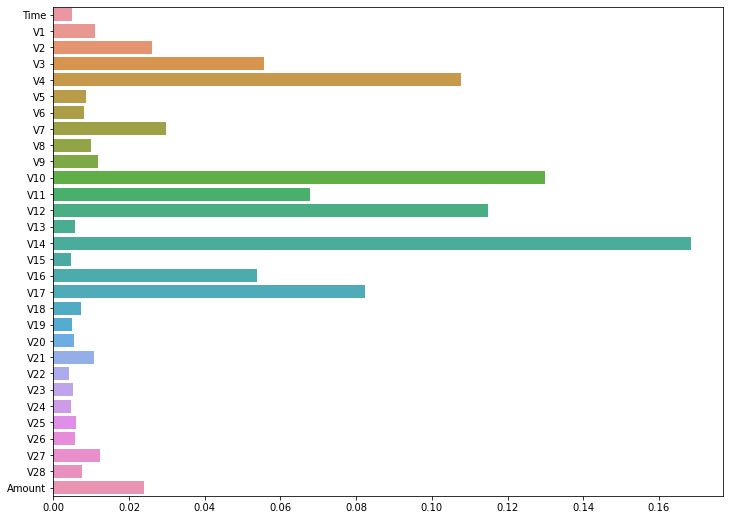

In [60]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_rf.feature_importances_,
            X_train.columns)
plt.show()

# VII. Modeling - LightGBM

> ## 1) Without SMOTE

> ### (1) Model 학습

In [61]:
%%time

from lightgbm import LGBMClassifier

Model_lgbm = LGBMClassifier(random_state = 2045)

Model_lgbm.fit(X_train, y_train)

CPU times: user 7.61 s, sys: 72.9 ms, total: 7.68 s
Wall time: 4.27 s


LGBMClassifier(random_state=2045)

> ### (2) 예측값 생성

In [62]:
y_hat = Model_lgbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[   88,    60],
       [  168, 85127]])

* Scores

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99930   0.99803   0.99866     85295
          부정    0.34375   0.59459   0.43564       148

    accuracy                        0.99733     85443
   macro avg    0.67152   0.79631   0.71715     85443
weighted avg    0.99816   0.99733   0.99769     85443



> ### (4) Feature Importance

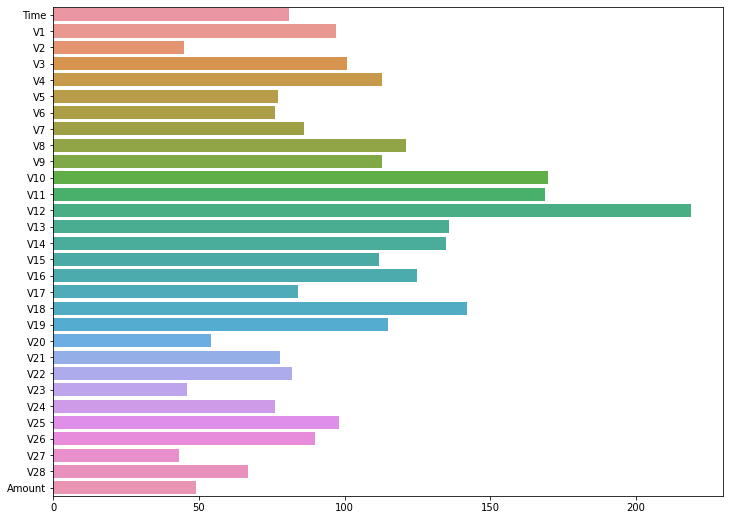

In [65]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_lgbm.feature_importances_,
            X_train.columns)
plt.show()

> ## 2) With SMOTE

> ### (1) Model 학습

In [66]:
%%time

from lightgbm import LGBMClassifier

Model_lgbm = LGBMClassifier(random_state = 2045)

Model_lgbm.fit(X_train_OS, y_train_OS)

CPU times: user 18.4 s, sys: 199 ms, total: 18.6 s
Wall time: 10.1 s


LGBMClassifier(random_state=2045)

> ### (2) 예측값 생성

In [67]:
y_hat = Model_lgbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  130,    18],
       [   89, 85206]])

* Scores

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99979   0.99896   0.99937     85295
          부정    0.59361   0.87838   0.70845       148

    accuracy                        0.99875     85443
   macro avg    0.79670   0.93867   0.85391     85443
weighted avg    0.99909   0.99875   0.99887     85443



> ### (4) Feature Importance

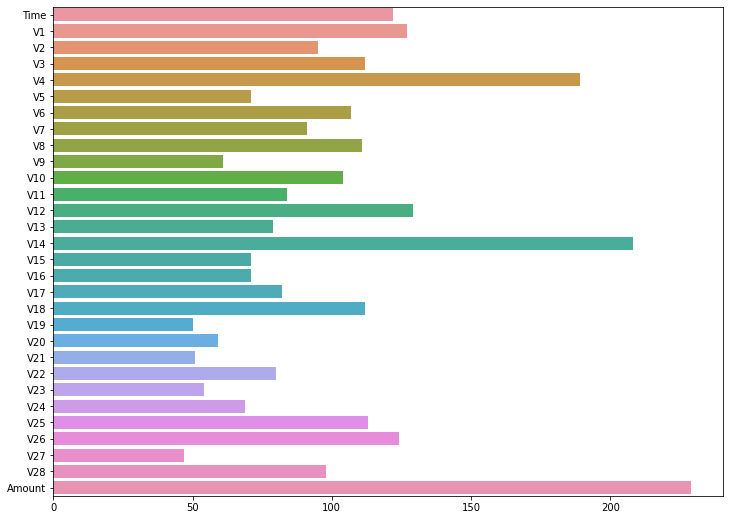

In [70]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_lgbm.feature_importances_,
            X_train.columns)
plt.show()

# VIII. Modeling - eXtra Gradient Boost (XGBoost)

> ## 1) Without SMOTE

> ### (1) Model 학습

In [71]:
%%time

from xgboost import XGBClassifier

Model_xgb = XGBClassifier(random_state = 2045)

Model_xgb.fit(X_train, y_train)

CPU times: user 50.3 s, sys: 106 ms, total: 50.4 s
Wall time: 53.1 s


XGBClassifier(random_state=2045)

> ### (2) 예측값 생성

In [72]:
y_hat = Model_xgb.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  126,    22],
       [   13, 85282]])

* Scores

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99974   0.99985   0.99979     85295
          부정    0.90647   0.85135   0.87805       148

    accuracy                        0.99959     85443
   macro avg    0.95311   0.92560   0.93892     85443
weighted avg    0.99958   0.99959   0.99958     85443



> ### (4) Feature Importance

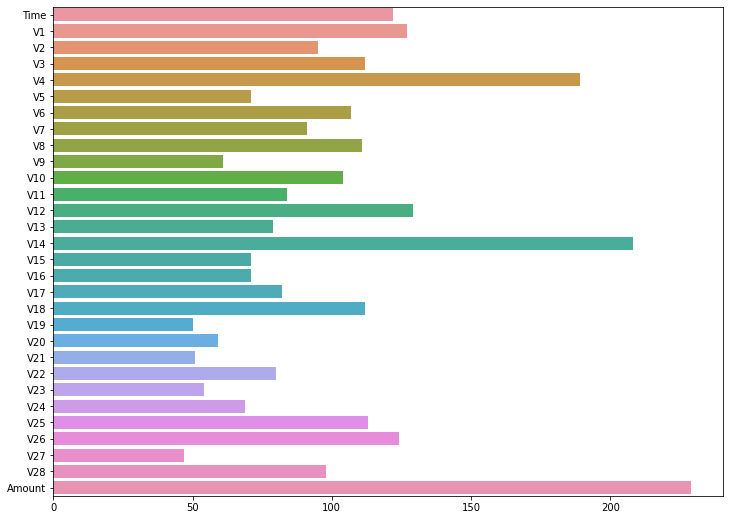

In [75]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_lgbm.feature_importances_,
            X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 2분

> ### (1) Model 학습

In [76]:
%%time

from xgboost import XGBClassifier

Model_xgb = XGBClassifier(random_state = 2045)

Model_xgb.fit(X_train_OS, y_train_OS)

CPU times: user 2min 2s, sys: 194 ms, total: 2min 2s
Wall time: 2min 2s


XGBClassifier(random_state=2045)

> ### (2) 예측값 생성

In [77]:
y_hat = Model_xgb.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  138,    10],
       [  972, 84323]])

* Scores

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99988   0.98860   0.99421     85295
          부정    0.12432   0.93243   0.21940       148

    accuracy                        0.98851     85443
   macro avg    0.56210   0.96052   0.60680     85443
weighted avg    0.99836   0.98851   0.99287     85443



> ### (4) Feature Importance

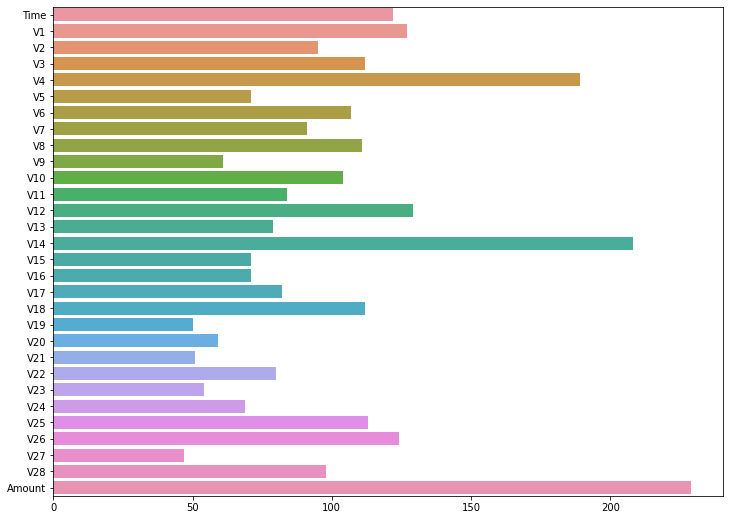

In [80]:
plt.figure(figsize = (12, 9))
sns.barplot(Model_lgbm.feature_importances_,
            X_train.columns)
plt.show()

# IX. Modeling - K-Nearest Neighbors (K-NN)

> ## 1) Without SMOTE

> ### (1) Model 학습

In [81]:
%%time

from sklearn.neighbors import KNeighborsClassifier

Model_knn = KNeighborsClassifier(n_neighbors = 3)

Model_knn.fit(X_train, y_train)

CPU times: user 30 ms, sys: 0 ns, total: 30 ms
Wall time: 31.2 ms


KNeighborsClassifier(n_neighbors=3)

> ### (2) 예측값 생성

* 약 5분

In [82]:
%%time

y_hat = Model_knn.predict(X_test)

CPU times: user 5min 9s, sys: 21.5 s, total: 5min 30s
Wall time: 4min 31s


> ### (3) Model 평가

* Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  101,    47],
       [    7, 85288]])

* Scores

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99945   0.99992   0.99968     85295
          부정    0.93519   0.68243   0.78906       148

    accuracy                        0.99937     85443
   macro avg    0.96732   0.84118   0.89437     85443
weighted avg    0.99934   0.99937   0.99932     85443



# 
# 
# 
# The End
# 
# 
# 